In [1]:
import pandas as pd
import numpy as np
import datetime
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
data = pd.read_csv('data/analysis/D1_XAUXAGEUR_Returns.csv', parse_dates=[0], index_col='Date')
#print(data.head())

In [3]:
#Date related features
data['Week'] = data.index.week
data['Day_Week'] = data.index.dayofweek
data['daily_return'] = data.Close.pct_change().mul(100)
data['day_week_sin'] = np.sin(data.Day_Week*(2.*np.pi/7))
data['day_week_cos'] = np.cos(data.Day_Week*(2.*np.pi/7))
data['week_sin'] = np.sin((data.Week-1)*(2.*np.pi/52))
data['week_cos'] = np.cos((data.Week-1)*(2.*np.pi/52))
data['yearday_sin'] = np.sin((data.Yearday)*(2.*np.pi/365.25))
data['yearday_cos'] = np.cos((data.Yearday)*(2.*np.pi/365.25))

#XAU Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_XAU'] = ta.SMA(data.Close, timeperiod = 50)
#Simple Moving Average - 200 day
data['SMA_200_XAU'] = ta.SMA(data.Close, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_XAU'] = ta.EMA(data.Close, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_XAU'] = ta.EMA(data.Close, timeperiod = 21)
# MACD
data['macd_XAU'], data['macdsignal_XAU'], data['macdhist_XAU'] = ta.MACD(data.Close, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_XAU'] = ta.RSI(data.Close, timeperiod=14)
#Define relative indicators
data['SMA_Delta_XAU'] = (data['SMA_50_XAU'] - data['SMA_200_XAU']) / data['Close']
#Define relative indicators
data['EMA_Delta_XAU'] = (data['EMA_9_XAU'] - data['EMA_21_XAU']) / data['Close']

#XAG Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_XAG'] = ta.SMA(data.Close_XAG, timeperiod = 50)
#Simple Moving Average - 200 day
data['SMA_200_XAG'] = ta.SMA(data.Close_XAG, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_XAG'] = ta.EMA(data.Close_XAG, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_XAG'] = ta.EMA(data.Close_XAG, timeperiod = 21)
# MACD
data['macd_XAG'], data['macdsignal_XAG'], data['macdhist_XAG'] = ta.MACD(data.Close_XAG, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_XAG'] = ta.RSI(data.Close_XAG, timeperiod=14)
#Define relative indicators
data['SMA_Delta_XAG'] = (data['SMA_50_XAG'] - data['SMA_200_XAG']) / data['Close_XAG']
#Define relative indicators
data['EMA_Delta_XAG'] = (data['EMA_9_XAG'] - data['EMA_21_XAG']) / data['Close_XAG']


#EUR Technical Indicators
#Simple Moving Average - 50 day
data['SMA_50_EUR'] = ta.SMA(data.Close_EUR, timeperiod = 50)
#Simple Moving Average - 200 day
data['SMA_200_EUR'] = ta.SMA(data.Close_EUR, timeperiod = 200)
# Exponential Moving Average - 9 day
data['EMA_9_EUR'] = ta.EMA(data.Close_EUR, timeperiod = 9)
# Exponential Moving Average - 21 day
data['EMA_21_EUR'] = ta.EMA(data.Close_EUR, timeperiod = 21)
# MACD
data['macd_EUR'], data['macdsignal_EUR'], data['macdhist_EUR'] = ta.MACD(data.Close_EUR, fastperiod=12, slowperiod=200, signalperiod=9)
# RSI
data['RSI_EUR'] = ta.RSI(data.Close_EUR, timeperiod=14)
#Define relative indicators
data['SMA_Delta_EUR'] = (data['SMA_50_EUR'] - data['SMA_200_EUR']) / data['Close_EUR']
#Define relative indicators
data['EMA_Delta_EUR'] = (data['EMA_9_EUR'] - data['EMA_21_EUR']) / data['Close_EUR']

In [4]:
#Additional indicators
data['XAU_XAG_Ratio'] = data['Close']/data['Close_XAG']

In [5]:
print(data.tail())

               Open     High      Low    Close    Volume   Weekday  Yearday  \
Date                                                                          
2019-04-25  1274.63  1282.53  1273.31  1278.56   97134.0  Thursday    115.0   
2019-04-26  1278.56  1288.61  1273.72  1285.69  107326.0    Friday    116.0   
2019-04-28  1286.28  1286.62  1285.63  1285.80    1913.0    Sunday    118.0   
2019-04-29  1285.79  1286.57  1277.99  1280.33   80222.0    Monday    119.0   
2019-04-30  1280.32  1286.12  1279.84  1283.11  103615.0   Tuesday    120.0   

            Daily_return  Log_daily_Return  Open_XAG  ...  SMA_200_EUR  \
Date                                                  ...                
2019-04-25      0.308325          0.003079    14.919  ...     1.139869   
2019-04-26      0.557659          0.005561    14.946  ...     1.139623   
2019-04-28      0.008556          0.000086    15.060  ...     1.139388   
2019-04-29     -0.425416         -0.004263    15.045  ...     1.139204   
20

In [6]:
#Choosing target variable
#data['Large_return'] = np.where(data['daily_return']>=0.1, 1, (np.where(data['daily_return']<=-0.1, -1, 0)))
data['Large_return'] = np.where(data['daily_return']>=0.1, 1, 0)

In [7]:
#Drop rows with nan values
data.dropna(inplace=True)

In [8]:
#Pick features
features_list = ['Volume','day_week_sin','day_week_cos','week_sin','week_cos','yearday_sin','yearday_cos',
                 'macdhist_XAU', 'RSI_XAU', 'SMA_Delta_XAU','EMA_Delta_XAU', 
                 'macdhist_XAG', 'RSI_XAG', 'SMA_Delta_XAG','EMA_Delta_XAG',
                 'macdhist_EUR', 'RSI_EUR', 'SMA_Delta_EUR','EMA_Delta_EUR','XAU_XAG_Ratio']
features = data[features_list]
features.head()

,Volume,day_week_sin,day_week_cos,week_sin,week_cos,yearday_sin,yearday_cos,macdhist_XAU,RSI_XAU,SMA_Delta_XAU,EMA_Delta_XAU,macdhist_XAG,RSI_XAG,SMA_Delta_XAG,EMA_Delta_XAG,macdhist_EUR,RSI_EUR,SMA_Delta_EUR,EMA_Delta_EUR,XAU_XAG_Ratio
Date,,,,,,,,,,,,,,,,,,,,
2004-04-06,28012.0,0.781831,0.623490,0.992709,-0.120537,0.995218,-0.097683,0.835891,56.609604,0.027830,0.009050,0.141806,80.372899,0.152315,0.036084,-0.005320,43.958454,0.031995,-0.005006,51.541395
2004-04-07,29157.0,0.974928,-0.222521,0.992709,-0.120537,0.993390,-0.114788,0.945130,59.479349,0.027622,0.008927,0.129142,77.194962,0.155567,0.035573,-0.004467,46.469942,0.030594,-0.004389,52.181818
2004-04-08,26014.0,0.433884,-0.900969,0.992709,-0.120537,0.991269,-0.131859,0.631319,55.600817,0.027745,0.008038,0.105141,71.841511,0.159452,0.033693,-0.004830,42.379317,0.029433,-0.004732,52.327672
2004-04-09,3248.0,-0.433884,-0.900969,0.992709,-0.120537,0.988854,-0.148890,0.377046,55.644533,0.027506,0.007211,0.080073,70.008137,0.161958,0.031203,-0.004799,43.084612,0.027776,-0.004759,52.509711
2004-04-11,478.0,-0.781831,0.623490,0.992709,-0.120537,0.983147,-0.182817,0.166519,55.644533,0.027197,0.006479,0.063745,71.405227,0.162816,0.029222,-0.004843,42.271994,0.026108,-0.004860,52.195790


In [9]:
#Pick target variable 
target_unshifted = data['Large_return']
#Add shift so we can predict target on time t=1 with features from time t
target = target_unshifted.shift(-1)
#Drop last value from features and target (Nan)
features = features[:-1]
target = target[:-1]
print(features.tail())
print(target.tail())

              Volume  day_week_sin  day_week_cos  week_sin  week_cos  \
Date                                                                   
2019-04-24   97655.0      0.974928     -0.222521  0.935016 -0.354605   
2019-04-25   97134.0      0.433884     -0.900969  0.935016 -0.354605   
2019-04-26  107326.0     -0.433884     -0.900969  0.935016 -0.354605   
2019-04-28    1913.0     -0.781831      0.623490  0.935016 -0.354605   
2019-04-29   80222.0      0.000000      1.000000  0.885456 -0.464723   

            yearday_sin  yearday_cos  macdhist_XAU    RSI_XAU  SMA_Delta_XAU  \
Date                                                                           
2019-04-24     0.924803    -0.380447     -5.678111  36.919560       0.027941   
2019-04-25     0.918121    -0.396299     -4.703945  41.584253       0.026725   
2019-04-26     0.911169    -0.412034     -3.080393  48.958735       0.025682   
2019-04-28     0.896456    -0.443132     -1.883483  49.065567       0.024909   
2019-04-29     

In [10]:
target.value_counts()

0.0    2580
1.0    2134
Name: Large_return, dtype: int64

In [11]:
def split_train_test(data, train_ratio):
    indices = np.arange(len(data))
    train_set_size = int(len(data) * train_ratio)
    train_indices = indices[:train_set_size]
    test_indices = indices[train_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

X_train_set, X_test_set = split_train_test(features, 0.8)

In [12]:
print(len(X_train_set))
print(len(X_test_set))
print("Training Series:", "\n", X_train_set.head(), "\n")
print("Training Series:", "\n", X_train_set.tail(), "\n")
print("Testing Series:", "\n", X_test_set.head())
print("Testing Series:", "\n", X_test_set.tail())

3771
943
Training Series: 
              Volume  day_week_sin  day_week_cos  week_sin  week_cos  \
Date                                                                  
2004-04-06  28012.0      0.781831      0.623490  0.992709 -0.120537   
2004-04-07  29157.0      0.974928     -0.222521  0.992709 -0.120537   
2004-04-08  26014.0      0.433884     -0.900969  0.992709 -0.120537   
2004-04-09   3248.0     -0.433884     -0.900969  0.992709 -0.120537   
2004-04-11    478.0     -0.781831      0.623490  0.992709 -0.120537   

            yearday_sin  yearday_cos  macdhist_XAU    RSI_XAU  SMA_Delta_XAU  \
Date                                                                           
2004-04-06     0.995218    -0.097683      0.835891  56.609604       0.027830   
2004-04-07     0.993390    -0.114788      0.945130  59.479349       0.027622   
2004-04-08     0.991269    -0.131859      0.631319  55.600817       0.027745   
2004-04-09     0.988854    -0.148890      0.377046  55.644533       0.0275

In [13]:
y_train_set, y_test_set = split_train_test(target, 0.8)

In [14]:
print(len(y_train_set))
print(len(y_test_set))
print("Training Series:", "\n", y_train_set.head(), "\n")
print("Training Series:", "\n", y_train_set.tail(), "\n")
print("Testing Series:", "\n", y_test_set.head())
print("Testing Series:", "\n", y_test_set.tail())

3771
943
Training Series: 
 Date
2004-04-06    1.0
2004-04-07    0.0
2004-04-08    0.0
2004-04-09    0.0
2004-04-11    0.0
Name: Large_return, dtype: float64 

Training Series: 
 Date
2016-04-18    1.0
2016-04-19    0.0
2016-04-20    1.0
2016-04-21    0.0
2016-04-22    0.0
Name: Large_return, dtype: float64 

Testing Series: 
 Date
2016-04-24    1.0
2016-04-25    1.0
2016-04-26    1.0
2016-04-27    1.0
2016-04-28    1.0
Name: Large_return, dtype: float64
Testing Series: 
 Date
2019-04-24    1.0
2019-04-25    1.0
2019-04-26    0.0
2019-04-28    0.0
2019-04-29    1.0
Name: Large_return, dtype: float64


In [15]:
#Scale test and train data
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train_norm = min_max_scaler.fit_transform(X_train_set)
X_test_norm = min_max_scaler.fit_transform(X_test_set)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5).split(X_train_norm)


model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'loss' : ['deviance', 'exponential'],
    'n_estimators': [10, 20, 50,100, 200, 300, 500, 1000],
    'learning_rate': [0.005, 0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2'] 
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= tscv, scoring='f1_macro')


CV_rfc.fit(X_train_norm,y_train_set.values.ravel())
y_model = CV_rfc.predict(X_test_norm)
#model.fit(X_train_set, y_train_set.values.ravel())
#y_model = model.predict(X_test_set)

In [19]:
from sklearn import metrics
print (CV_rfc.best_params_)
print (CV_rfc.best_score_)

{'learning_rate': 0.01, 'loss': 'exponential', 'max_features': 'auto', 'n_estimators': 200}
0.5153749623383828


In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test_set, y_model))

              precision    recall  f1-score   support

         0.0       0.57      0.85      0.68       527
         1.0       0.49      0.18      0.27       416

   micro avg       0.56      0.56      0.56       943
   macro avg       0.53      0.52      0.47       943
weighted avg       0.53      0.56      0.50       943



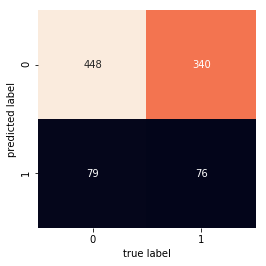

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_set, y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');